GitHub repo: https://github.com/shillis17/cs235Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This next chunk reads in all the data that I have saved, and is updated to read from the GitHub Repo that I have created so no additional files are required to run this notebook.

In [2]:
College_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/colleges/colleges.csv")
Death_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/excess-deaths/deaths.csv")
Mask_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/mask-use/mask-use-by-county.csv")
Prison_Data= pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/prisons/facilities.csv")
County20_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/us-counties-2020.csv")
County21_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/us-counties-2021.csv")
County22_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/us-counties-2022.csv")
US_Data = pd.read_csv("https://raw.githubusercontent.com/shillis17/cs235Project/main/data_raw/us.csv")

## The next few chunks are set to look at the data and clean features that have no use to the questions that I would like to research with the data. This cells also combine some data frames into a single frame and save the new data frame as a csv for quicker use of the data in the future.

In [3]:
College_Data.set_index(["state","county"],inplace=True)
Death_Data.set_index(["country"],inplace=True)
Mask_Data.set_index("COUNTYFP",inplace=True)
Prison_Data.set_index(["facility_state","facility_county"],inplace = True)
County_Data = ((County20_Data.append(County21_Data)).append(County22_Data)).set_index(["date","state","county"])
US_Data.set_index("date",inplace=True)

In [4]:
College_Data.drop(["ipeds_id","notes"],axis=1,inplace=True)
College_Data.head()

date        city                          college  \
state   county                                                                
Alabama Madison     2021-05-26  Huntsville           Alabama A&M University   
        Montgomery  2021-05-26  Montgomery         Alabama State University   
        Limestone   2021-05-26      Athens          Athens State University   
        Lee         2021-05-26      Auburn                Auburn University   
        Montgomery  2021-05-26  Montgomery  Auburn University at Montgomery   

                    cases  cases_2021  
state   county                         
Alabama Madison        41         NaN  
        Montgomery      2         NaN  
        Limestone      45        10.0  
        Lee          2742       567.0  
        Montgomery    220        80.0

In [5]:
Death_Data.drop(["placename","frequency","start_date","end_date","baseline"],axis=1,inplace=True)
Death_Data = Death_Data.loc["United States"]
Death_Data = Death_Data.loc[Death_Data["year"] != "2017-2019 average"]
Death_Data.head()

,year,month,week,deaths,expected_deaths,excess_deaths
country,,,,,,
United States,2020,1,2.0,60710,60757.0,-47.0
United States,2020,1,3.0,59360,60179.0,-819.0
United States,2020,1,4.0,59140,60064.0,-924.0
United States,2020,2,5.0,58800,60821.0,-2021.0
United States,2020,2,6.0,59380,60545.0,-1165.0


In [6]:
Mask_Data.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
COUNTYFP,,,,,
1001,0.053,0.074,0.134,0.295,0.444
1003,0.083,0.059,0.098,0.323,0.436
1005,0.067,0.121,0.120,0.201,0.491
1007,0.020,0.034,0.096,0.278,0.572
1009,0.053,0.114,0.180,0.194,0.459


In [7]:
Prison_Data.drop(["facility_county_fips","facility_city","facility_lng","facility_lat","note"],axis=1,inplace=True)
Prison_Data.head()

nyt_id  \
facility_state facility_county             
Alabama        Coosa            F3EFE858   
               Shelby           5B910220   
               Bibb             02FB1675   
               Jefferson        6378F6C4   
               Bullock          EAABF900   

                                                                    facility_name  \
facility_state facility_county                                                      
Alabama        Coosa                                Alex City Work Release prison   
               Shelby               Alabama Therapeutic Education Facility prison   
               Bibb                                    Bibb Correctional Facility   
               Jefferson        Birmingham Women's Community Based Facility an...   
               Bullock                              Bullock Correctional Facility   

                                              facility_type  \
facility_state facility_county                                
Alabama        Coosa              Low-security work release   
               Shelby           State rehabilitation center   
               Bibb                            State prison   
               Jefferson                       State prison   
               Bullock                         State prison   

                                latest_inmate_population  \
facility_state facility_county                             
Alabama        Coosa                               188.0   
               Shelby                              272.0   
               Bibb                               1725.0   
               Jefferson                           192.0   
               Bullock                            1477.0   

                                max_inmate_population_2020  \
facility_state facility_county                               
Alabama        Coosa                                   NaN   
               Shelby                                  NaN   
               Bibb                                 1825.0   
               Jefferson                               NaN   
               Bullock                              1577.0   

                                total_inmate_cases  total_inmate_deaths  \
facility_state facility_county                                            
Alabama        Coosa                            77                    0   
               Shelby                           11                    1   
               Bibb                            164                    3   
               Jefferson                        17                    0   
               Bullock                         162                    5   

                                total_officer_cases  total_officer_deaths  
facility_state facility_county                                             
Alabama        Coosa                             17                   0.0  
               Shelby                             2                   0.0  
               Bibb                              61                   0.0  
               Jefferson                         28                   0.0  
               Bullock                           80                   1.0

In [8]:
County_Data.drop("fips",axis=1,inplace=True)
County_Data.head()

cases  deaths
date       state      county                  
2020-01-21 Washington Snohomish      1     0.0
2020-01-22 Washington Snohomish      1     0.0
2020-01-23 Washington Snohomish      1     0.0
2020-01-24 Illinois   Cook           1     0.0
           Washington Snohomish      1     0.0

In [9]:
US_Data.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


In [10]:
College_Data.to_csv("../data_clean/College_Data.csv")
Death_Data.to_csv("../data_clean/Death_Data.csv")
Mask_Data.to_csv("../data_clean/Mask_Data.csv")
Prison_Data.to_csv("../data_clean/Prison_Data.csv")
County_Data.to_csv("../data_clean/County_Data.csv")
US_Data.to_csv("../data_clean/US_data.csv")

# Time for some EDA before I begin asnwering my questions

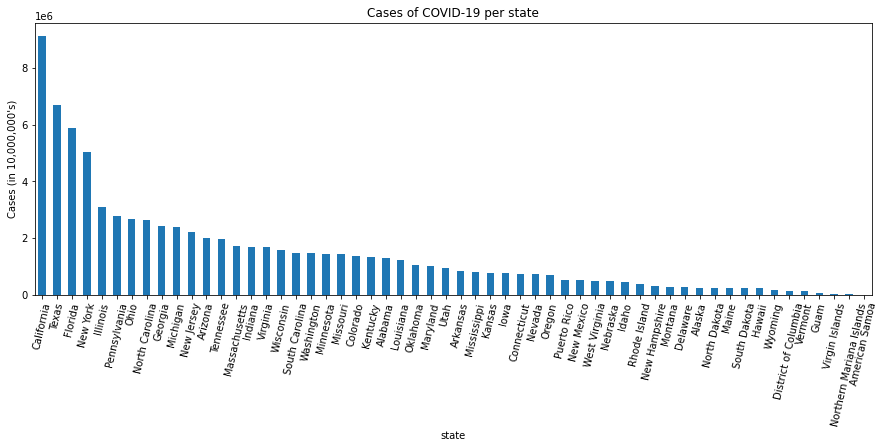

In [79]:
County_Data.loc["2022-04-11"].groupby("state")["cases"].sum().sort_values(ascending=False).plot(kind="bar",figsize = (15,5))
plt.xticks(rotation=77)
plt.ylabel("Cases (in 10,000,000's)")
plt.title("Cases of COVID-19 per state")
plt.show()

## Now that the data is clean I can begin to answer some of the questions outlined in my proposal.

### Lets start with comparing the college cases to the total cases, instead of doing this for all 50 states, I am going to pick the 5 states that have the largest ammount of covid cases measuring up to 2022-04-11.

In [11]:
County_Data.loc["2022-04-11"].groupby("state")["cases"].sum().sort_values(ascending=False)[0:5]

state
California    9134794
Texas         6707110
Florida       5867926
New York      5027587
Illinois      3090590
Name: cases, dtype: int64

California  
% of covid cases reported from colleges.

In [12]:
round((College_Data.loc["California"]["cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["California"].sum())*100,2)

0.24

Texas  
% of covid cases reported from colleges.

In [13]:
round((College_Data.loc["Texas"]["cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Texas"].sum())*100,2)

0.77

Florida  
% of covid cases reported from colleges.

In [14]:
round((College_Data.loc["Florida"]["cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Florida"].sum())*100,2)

0.6

New york  
% of covid cases reported from colleges.

In [15]:
round((College_Data.loc["New York"]["cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["New York"].sum())*100,2)

0.78

Illinois  
% of covid cases reported from colleges.

In [16]:
round((College_Data.loc["Illinois"]["cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Illinois"].sum())*100,2)

0.76

### Now I will check the infection rates in prison in the same states to see if there is a difference between the school cases and prison cases.

California  
% of covid cases reported from prisons.

In [17]:
round((Prison_Data.loc["California"]["total_inmate_cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["California"].sum())*100,2)

0.82

Texas  
% of covid cases reported from prisons.

In [18]:
round((Prison_Data.loc["Texas"]["total_inmate_cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Texas"].sum())*100,2)

0.86

Florida     
% of covid cases reported from prisons.

In [19]:
round((Prison_Data.loc["Florida"]["total_inmate_cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Florida"].sum())*100,2)

0.5

New york  
% of covid cases reported from prisons.

In [20]:
round((Prison_Data.loc["New York"]["total_inmate_cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["New York"].sum())*100,2)

0.19

Illinois  
% of covid cases reported from prisons.

In [21]:
round((Prison_Data.loc["Illinois"]["total_inmate_cases"].sum()/County_Data.loc["2022-04-11"]["cases"]["Illinois"].sum())*100,2)

0.56

## Covid Infection rate changes from 2020 - 2022

Text(0, 0.5, "Cases (in 10,000,000's)")

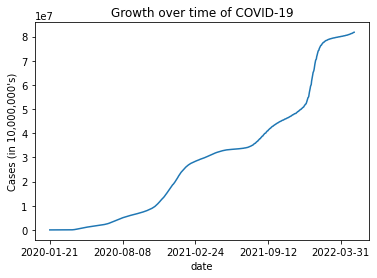

In [45]:
US_Data["cases"].plot()
plt.title("Growth over time of COVID-19")
plt.ylabel("Cases (in 10,000,000's)")

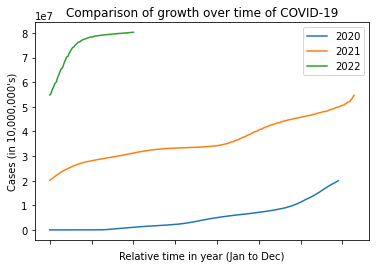

In [50]:
Plot_2020 = US_Data["2020-01-21" : "2020-12-31"]["cases"].plot()
Plot_2021 = US_Data["2021-01-01" : "2021-12-31"]["cases"].plot()
Plot_2022 = US_Data["2022-01-01" : "2022-04-11"]["cases"].plot()
plt.legend(["2020","2021",'2022'])
plt.title("Comparison of growth over time of COVID-19")
plt.ylabel("Cases (in 10,000,000's)")
plt.xlabel("Relative time in year (Jan to Dec)")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()